# Comparing Three Nested Watersheds
In this notebook we'll examine three sites along the Gwynns Falls, in Maryland. 'Falls' in this case is a local word for 'River', like in the Jones Falls or Gunpowder Falls. It doesn't refer to a waterfall!

Because the three sites are in a row on the same river, the upstream site has a watershed that is nested inside of the middle site, which is nested inside the downstream site, which has the largest watershed.

In [1]:
import hydrofunctions as hf
%matplotlib inline

The three stream gauges are:

- the farthest upstream is GWYNNS FALLS NEAR DELIGHT, MD, dv01589197
- the middle of stream is GWYNNS FALLS AT VILLA NOVA, MD, dv01589300
- the farthest downstream is GWYNNS FALLS AT WASHINGTON BLVD AT BALTIMORE, MD, dv01589352

In [2]:
streamid = ['01589197', '01589300','01589352']
# request data for our two sites for a three-year period.
sites = hf.NWIS(streamid, 'dv', start_date='2001-01-01', end_date='2003-12-31')
sites

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=01589197%2C01589300%2C01589352&startDT=2001-01-01&endDT=2003-12-31


USGS:01589197: GWYNNS FALLS NEAR DELIGHT, MD
    00060: <Day>  Discharge, cubic feet per second
USGS:01589300: GWYNNS FALLS AT VILLA NOVA, MD
    00060: <Day>  Discharge, cubic feet per second
USGS:01589352: GWYNNS FALLS AT WASHINGTON BLVD AT BALTIMORE, MD
    00060: <Day>  Discharge, cubic feet per second
Start: 2001-01-01 00:00:00+00:00
End:   2003-12-31 00:00:00+00:00

In [3]:
#create a dataframe of the sites
Q = sites.df('discharge')
#rename the columns
Q.columns=['Upper', 'Middle', 'Lower']
#show the first few rows of the data
Q.head()

,Upper,Middle,Lower
datetimeUTC,,,
2001-01-01 00:00:00+00:00,1.8,18.0,29.0
2001-01-02 00:00:00+00:00,1.8,17.0,28.0
2001-01-03 00:00:00+00:00,1.8,16.0,27.0
2001-01-04 00:00:00+00:00,1.8,17.0,31.0
2001-01-05 00:00:00+00:00,1.8,16.0,31.0


In [4]:
#look at the descriptive statistics for each part of the stream. 
#Note that the mean and standard deviation increase as you move down the stream
Q.describe()

,Upper,Middle,Lower
count,1095.000000,1095.000000,1095.000000
mean,5.211306,44.910210,92.074055
std,10.177445,79.268103,173.157576
min,0.250000,1.860000,8.730000
25%,1.590000,14.000000,27.800000
50%,2.720000,24.400000,43.000000
75%,5.000000,42.850000,80.800000
max,161.000000,1140.000000,2140.000000


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fe91e24978>)

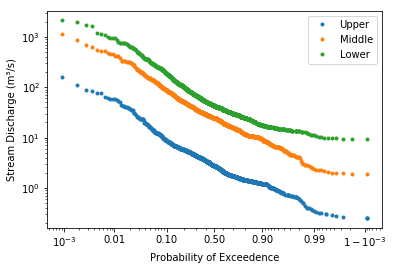

In [5]:
#create a flow duration for each of the streams
hf.flow_duration(Q)

C:\Users\Marty\Anaconda3\envs\py37hfdev\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


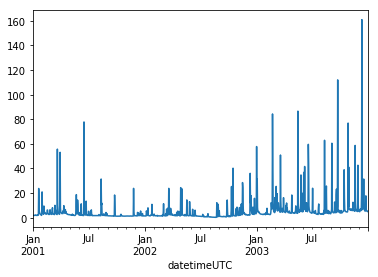

In [6]:
# create a hydrograph of the upper portion of the stream.
# the .loc method selects a subset of a dataframe.
# The first item selects rows, with ':' selecting every row.
# The second item selects columns, with 'Upper' selecting the column with the 'Upper' label.
# The .plot() method plots the values in the columns on the y axis, with the rows as the x axis.
Q.loc[:, 'Upper'].plot()